## About the Dataset
> * Fashion-MNIST is a dataset of of a training set of 60,000 examples and a test set of 10,000 examples.  
> * Each example is a 28x28 grayscale image, associated with a label from 10 classes.  
  
> * Each training and test example is assigned to one of the following labels:
  
> > * 0 T-shirt/top  
> > * 1 Trouser  
> > * 2 Pullover  
> > * 3 Dress  
> > * 4 Coat  
> > * 5 Sandal  
> > * 6 Shirt  
> > * 7 Sneaker  
> > * 8 Bag  
> > * 9 Ankle boot  

## Task
> * To come up with a model that can predict label for each image

# Libraries

In [1]:
# for numerical analysis
import numpy as np 
# to store and process in a dataframe
import pandas as pd 

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns

# image processing
import matplotlib.image as mpimg

# train test split
from sklearn.model_selection import train_test_split
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

# utility functions
from tensorflow.keras.utils import to_categorical
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Data

In [2]:
# list of files
! ls ../input/fashionmnist/

fashion-mnist_test.csv	 t10k-images-idx3-ubyte  train-images-idx3-ubyte
fashion-mnist_train.csv  t10k-labels-idx1-ubyte  train-labels-idx1-ubyte


In [3]:
# import train and test dataset
train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

In [4]:
# data shape
print(train.shape)
print(train.shape)

(60000, 785)
(60000, 785)


In [5]:
# train head
train.head(4)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0


In [6]:
# test head
test.head(4) 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0


In [7]:
# looking for missing values
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


In [8]:
# actural item corresponding to each label
item = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
        5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

# EDA

### Label count

[]

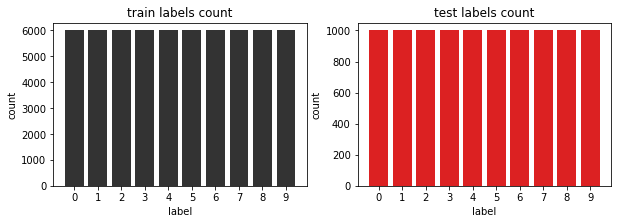

In [9]:
# label count

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.countplot(train['label'], palette=['#333333' for i in range(10)])
plt.title('train labels count')
plt.plot()

plt.subplot(1, 2, 2)
sns.countplot(test['label'], palette=['#fb0203' for i in range(10)])
plt.title('test labels count')
plt.plot()

### Train and test images

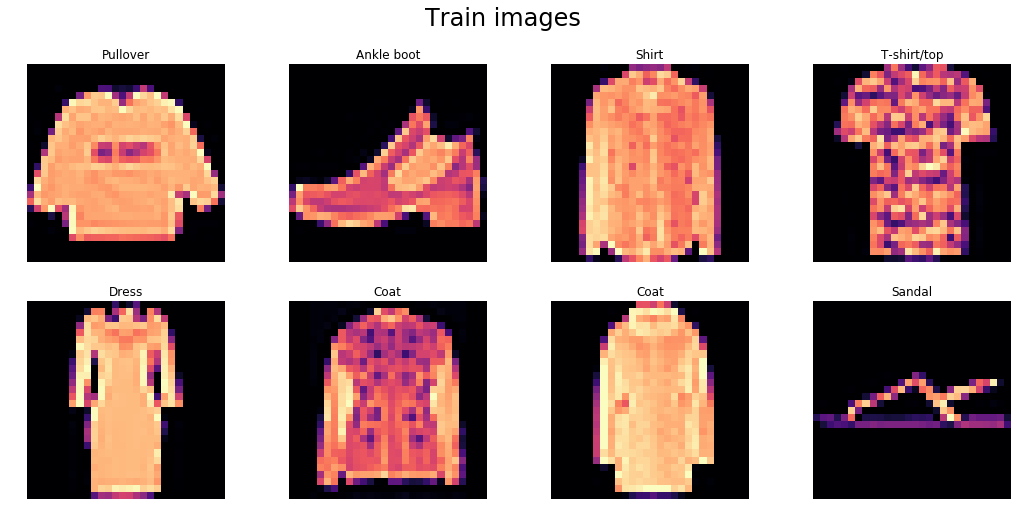

In [10]:
# first few train images with labels
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in train.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(item[row[0]])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Train images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

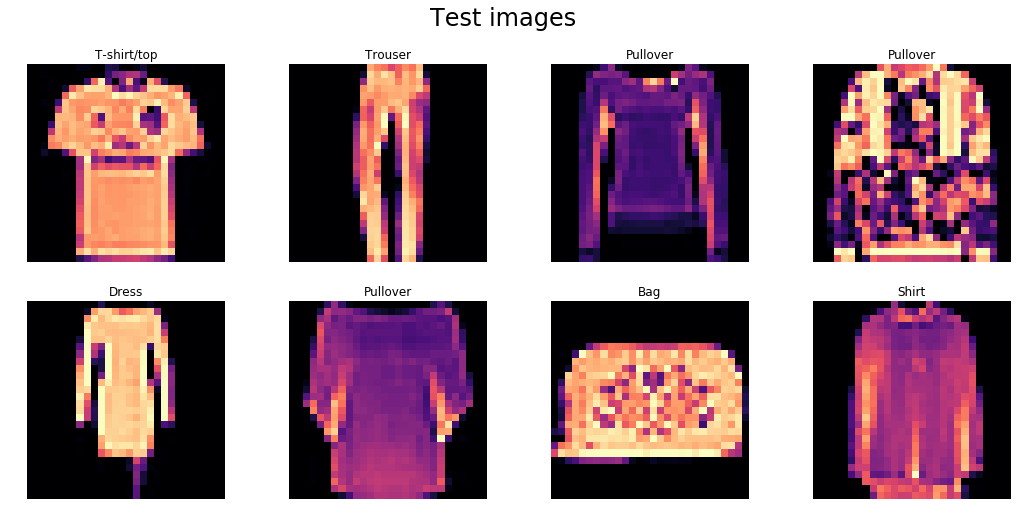

In [11]:
# first few test images with labels
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in test.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(item[row[0]])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

# Preprocessing

In [12]:
# split into image and labels and convert to numpy array
X_train = train.iloc[:, 1:].to_numpy()
y_train = train['label'].to_numpy()

X_test = test.iloc[:, 1:].to_numpy()
y_test = test['label'].to_numpy()

for i in [X_train, y_train, X_test, y_test]:
    print(i.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [13]:
# reshaping images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [14]:
# fix data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
# normalizing images
X_train = X_train/255.0
X_test = X_test/255.0

In [16]:
# one hot encoding targets
y_train_enc = to_categorical(y_train, num_classes=10)
y_test_enc = to_categorical(y_test, num_classes=10)

In [17]:
# shape
for i in [X_train, y_train_enc, X_test, y_test_enc]:
    print(i.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [18]:
# train validation split
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X_train, y_train_enc, test_size=0.3)
for i in [X_train, y_train_enc, X_val, y_val_enc]:
    print(i.shape)

(42000, 28, 28, 1)
(42000, 10)
(18000, 28, 28, 1)
(18000, 10)


# CNN

### Model parameters

In [19]:
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 10
VERBOSE = 2

### Defining CNN model

In [20]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

### Compile modle

In [21]:
# If the targets are one-hot encoded, use categorical_crossentropy.
# But if the targets are integers, use sparse_categorical_crossentropy

In [22]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Model summary

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

### Model fitting 

In [24]:
history = model.fit(X_train, y_train_enc,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Train on 29399 samples, validate on 12601 samples
Epoch 1/10
29399/29399 - 15s - loss: 0.8296 - accuracy: 0.6953 - val_loss: 0.4679 - val_accuracy: 0.8271
Epoch 2/10
29399/29399 - 14s - loss: 0.5025 - accuracy: 0.8163 - val_loss: 0.4090 - val_accuracy: 0.8465
Epoch 3/10
29399/29399 - 14s - loss: 0.4331 - accuracy: 0.8452 - val_loss: 0.3710 - val_accuracy: 0.8590
Epoch 4/10
29399/29399 - 14s - loss: 0.3844 - accuracy: 0.8636 - val_loss: 0.3430 - val_accuracy: 0.8731
Epoch 5/10
29399/29399 - 14s - loss: 0.3532 - accuracy: 0.8716 - val_loss: 0.3242 - val_accuracy: 0.8821
Epoch 6/10
29399/29399 - 14s - loss: 0.3291 - accuracy: 0.8802 - val_loss: 0.3055 - val_accuracy: 0.8887
Epoch 7/10
29399/29399 - 14s - loss: 0.3047 - accuracy: 0.8910 - val_loss: 0.2885 - val_accuracy: 0.8949
Epoch 8/10
29399/29399 - 13s - loss: 0.2879 - accuracy: 0.8963 - val_loss: 0.2781 - val_accuracy: 0.8987
Epoch 9/10
29399/29399 - 14s - loss: 0.2768 - accuracy: 0.8991 - val_loss: 0.2835 - val_accuracy: 0.8979
Epoch

### Accuracy and loss

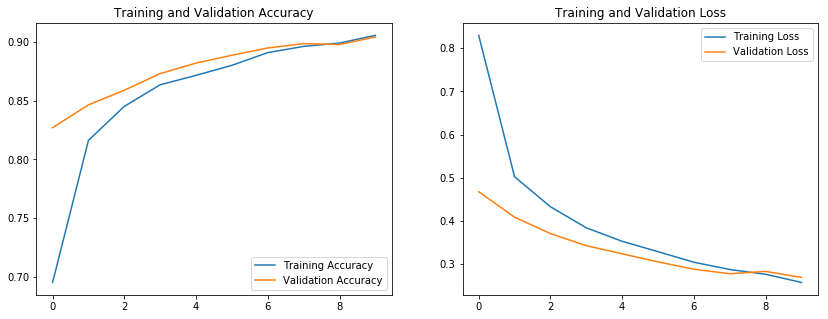

In [25]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()

### Evaluating model

In [26]:
# model loss and accuracy on validation set
model.evaluate(X_val, y_val_enc)

18000/18000 [==============================] - 3s 168us/sample - loss: 0.2754 - accuracy: 0.9017


[0.27540742626455095, 0.90166664]

### Predicting on test

In [27]:
# predicted values
y_pred_enc = model.predict(X_test)

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

[9.7060478e-01 7.1495242e-07 4.2374505e-04 4.9260758e-05 2.2042257e-06
 1.7118804e-08 2.8876888e-02 5.3448743e-09 4.2424948e-05 7.8831972e-09]
0


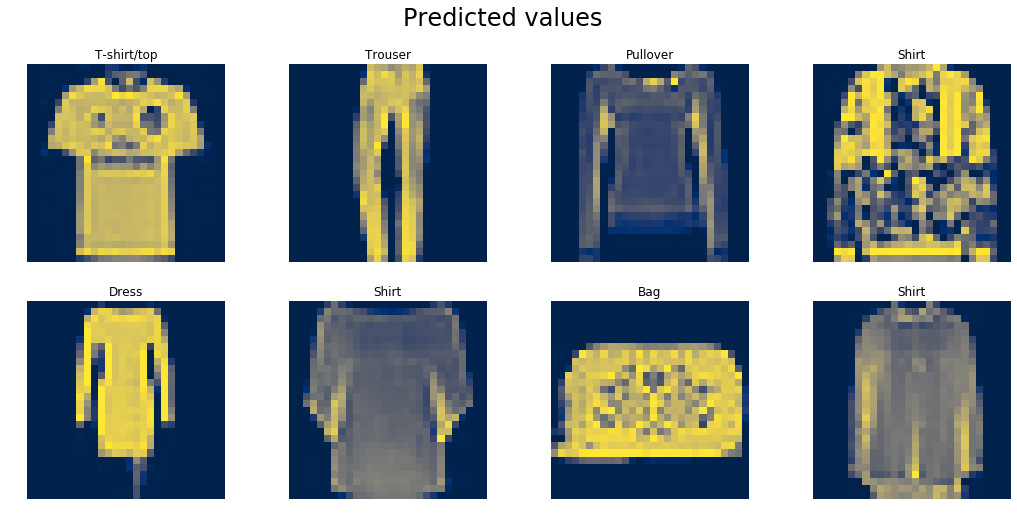

In [28]:
# predicted targets of each images
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in enumerate(X_test[:8]):
    plt.subplot(2, 4, ind+1)
    plt.title(item[y_pred[ind]])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.84      0.86      1000
           3       0.90      0.94      0.92      1000
           4       0.85      0.87      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.73      0.73      0.73      1000
           7       0.96      0.94      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



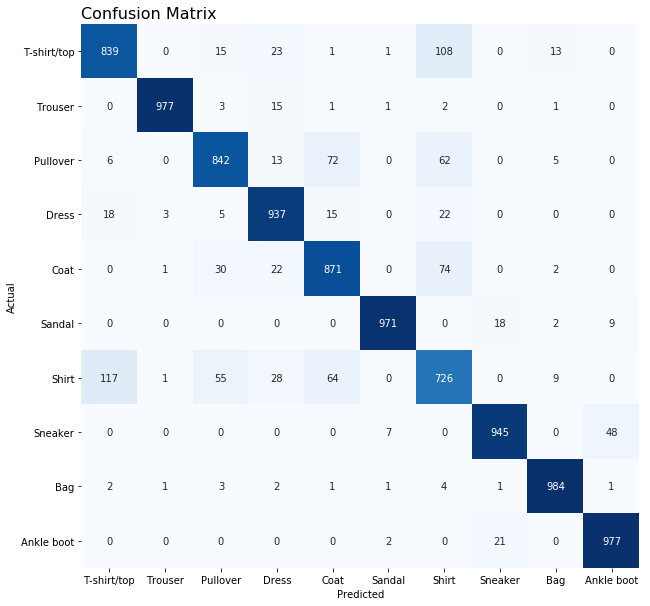

In [30]:
# y_pred_item = [item[i] for i in y_pred]
# y_test_item = [item[i] for i in y_test]

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(item.values())
ax.set_yticklabels(item.values(), rotation=0)
plt.show()